![Intro_Graphic_ Research_Page.png](<attachment:Intro_Graphic_ Research_Page.png>)

# Pymaceuticals Inc.
---

### Analysis 

# Analysis Instructions

## 1. Prepare the Data

**Objective:** Clean and organize the data to ensure accuracy and consistency in the analysis.

- **Data Collection:** 
  - Gather the `Mouse_metadata.csv` and `Study_results.csv` files, which contain the experimental data and mouse metadata, respectively.

- **Data Merging:** 
  - Combine the data from both files into a single dataset. This typically involves merging based on a common identifier, such as `Mouse ID`, to ensure each record is complete with relevant information from both datasets.

- **Data Cleaning:**
  - Identify and handle any duplicate records. Check for duplicate entries for the same `Mouse ID` at the same `Timepoint`.
  - Remove any duplicates to prevent skewed results.
  - Ensure data types are consistent and appropriate for analysis (e.g., numerical data should be in numeric formats).

## 2. Conduct Exploratory Data Analysis (EDA)

**Objective:** Gain insights into the data and identify any patterns or anomalies.

- **Descriptive Statistics:** 
  - Calculate basic statistics such as mean, median, and standard deviation for key metrics like tumor volume and metastatic sites across different drug regimens.

- **Visual Analysis:**
  - Create plots to visualize the distribution of tumor volumes across different drug regimens.
  - Use line plots to observe changes in tumor volume over time for each treatment group.
  - Generate bar charts to compare the number of metastatic sites among drug regimens.

## 3. Analyze Tumor Volume and Metastasis

**Objective:** Evaluate the effectiveness of different drug regimens in reducing tumor volume and controlling metastasis.

- **Tumor Volume Analysis:**
  - Calculate the average tumor volume for each drug regimen.
  - Compare the initial and final tumor volumes for mice under different treatments to assess the effectiveness over the study period.

- **Metastatic Sites Analysis:**
  - Determine the average number of metastatic sites for each drug regimen.
  - Analyze how treatments affect the progression of metastatic sites over time.

## 4. Compare Drug Efficacy

**Objective:** Identify the most effective drug regimens in reducing tumor size and metastasis.

- **Final Analysis:**
  - Rank drug regimens based on their ability to reduce tumor volume and control metastasis.
  - Pay special attention to Capomulin, as it is the company's drug of interest, and compare its performance against other treatments.

## 5. Summarize Findings

**Objective:** Provide a clear and concise summary of the study results for stakeholders.

- **Summary Report:**
  - Highlight key findings regarding the effectiveness of different drug regimens.
  - Include visualizations and statistical results to support your conclusions.
  - Make recommendations based on the findings, such as further testing for promising drugs or adjustments to current treatment strategies.

## 6. Present the Results

**Objective:** Prepare visualizations and documentation for a technical report.

- **Visualization:** 
  - Ensure all plots and charts are well-labeled and easy to interpret.

- **Documentation:** 
  - Draft a report that includes all tables and figures, with explanations for each. Ensure the document is structured to guide readers through the analysis logically.


### Analysis Conclusions & Observations

# Effectiveness of Drug Regimens on Tumor Volume

The average tumor volume for mice treated with **Capomulin** and **Ramicane** is significantly lower compared to other drug regimens.

- **Capomulin** and **Ramicane** have average tumor volumes of approximately 40.68 mm³ and 40.22 mm³, respectively, indicating their effectiveness in reducing tumor size.
- In contrast, other drugs such as **Ketapril**, **Naftisol**, and the **Placebo** group have higher average tumor volumes, with Ketapril having the highest at approximately 55.24 mm³.

## Tumor Volume at Final Timepoint

- At the final timepoint, **Capomulin** and **Ramicane** show the lowest average tumor volumes, with averages of 36.67 mm³ and 36.19 mm³, respectively.
- This suggests that these drugs are not only effective in reducing tumor volume initially but also in maintaining lower tumor sizes over time.
- Other regimens such as **Ketapril** and **Naftisol** have the highest tumor volumes at the final timepoint, indicating lesser effectiveness over the study duration.

## Metastatic Sites by Drug Regimen

- **Capomulin** and **Ramicane** also show a lower number of metastatic sites at the final timepoint, with averages of 1.28 and 1.20, respectively.
- This indicates that these regimens are effective in controlling the spread of cancer to other sites.
- On the other hand, regimens like **Naftisol**, **Zoniferol**, and **Placebo** show a higher number of metastatic sites, indicating less control over cancer spread.

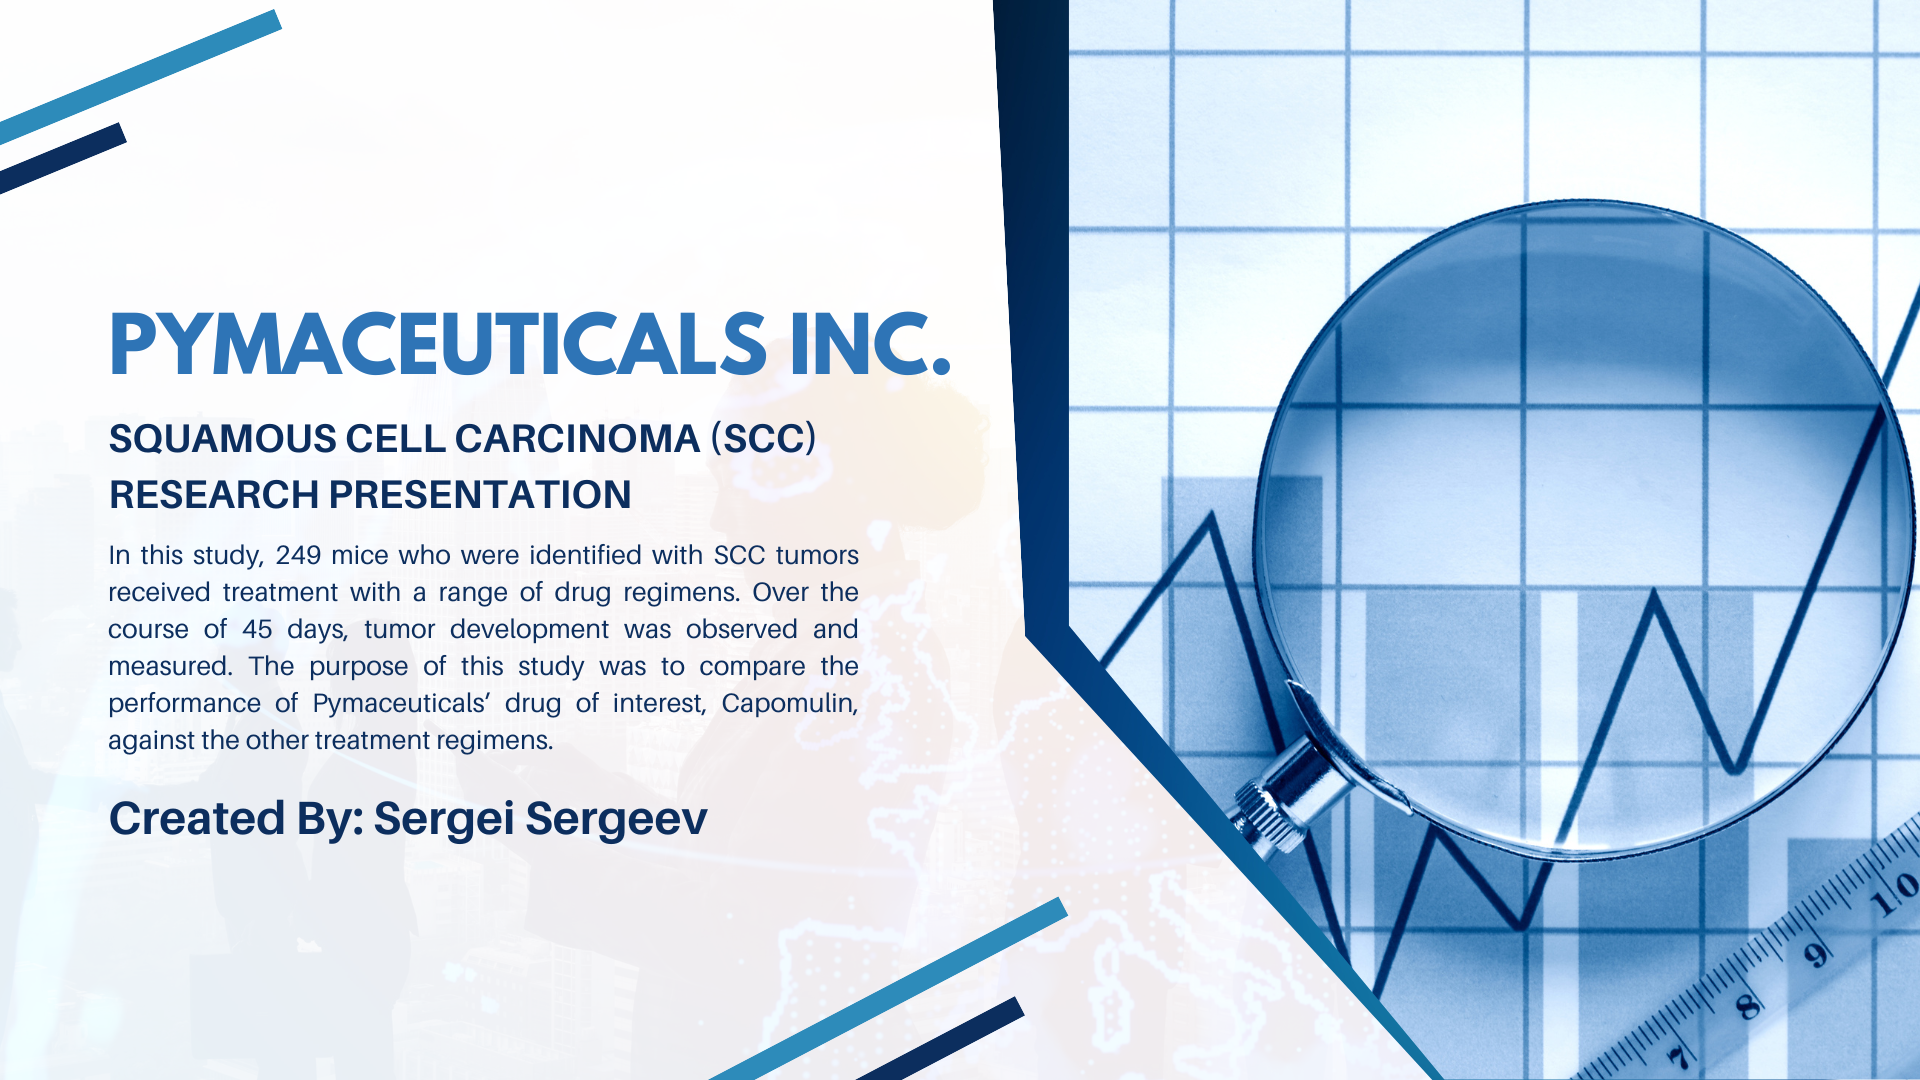

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

# Study data files
mouse_metadata_path = Path("data/Mouse_metadata.csv")
study_results_path = Path("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Merge the mouse_metadata and study_results DataFrames into a single DataFrame.
mouse_study_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_study_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
# Count the number of unique mice in the DataFrame.
mouse_count = len(mouse_study_data["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_study_data.loc[mouse_study_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
# Get all the data for the duplicate mouse ID.
duplicate_mouse_data = mouse_study_data.loc[mouse_study_data["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_data = mouse_study_data[mouse_study_data["Mouse ID"].isin(duplicate_mice) == False]
clean_mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
# Count the number of unique mice in the clean DataFrame.
clean_mouse_count = len(clean_mouse_study_data["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Group the clean_mouse_study_data DataFrame by Drug Regimen.
drug_regimen_group = clean_mouse_study_data.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen.
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_regimen_mean = drug_regimen_group["Tumor Volume (mm3)"].mean()
drug_regimen_median = drug_regimen_group["Tumor Volume (mm3)"].median()
drug_regimen_variance = drug_regimen_group["Tumor Volume (mm3)"].var()  
drug_regimen_std = drug_regimen_group["Tumor Volume (mm3)"].std()
drug_regimen_sem = drug_regimen_group["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": drug_regimen_mean,
    "Median Tumor Volume": drug_regimen_median,
    "Tumor Volume Variance": drug_regimen_variance,
    "Tumor Volume Std. Dev.": drug_regimen_std,
    "Tumor Volume Std. Err.": drug_regimen_sem
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Group the clean_mouse_study_data DataFrame by Drug Regimen and calculate summary statistics

summary_stats_single_line = clean_mouse_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    var="var",
    std="std",
    sem="sem"
)

summary_stats_single_line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

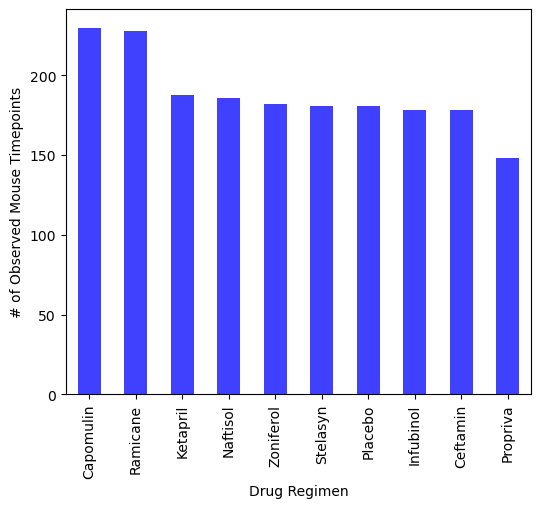

In [9]:
# Group the clean_mouse_study_data DataFrame by Drug Regimen and count the number of observations for each
y_axis = clean_mouse_study_data["Drug Regimen"].value_counts()

# Sort the values in descending order
y_axis = y_axis.sort_values(ascending=False)

# Create a bar plot using the sorted values
drug_regimen_bar_plot = y_axis.plot(kind="bar", color="b", alpha=0.75, align="center", width=0.5, figsize=(6, 5))

# Set the xlabel and ylabel using class methods
drug_regimen_bar_plot.set_xlabel("Drug Regimen")
drug_regimen_bar_plot.set_ylabel("# of Observed Mouse Timepoints")

# Display the bar plot
plt.show()


Text(0, 0.5, '# of Observed Mouse Timepoints')

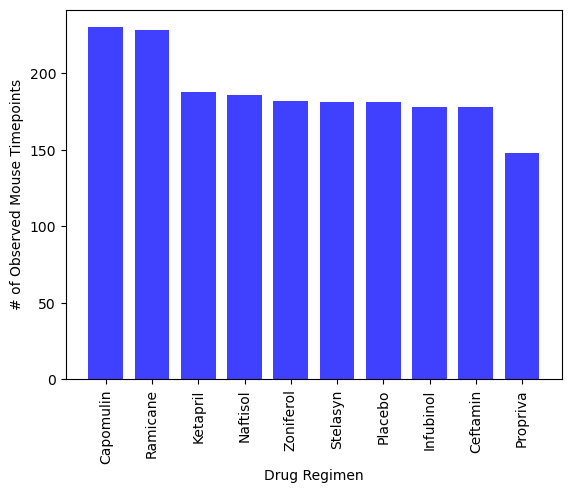

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create a bar plot using the sorted values
# Show the x-axis labels vertically
plt.bar(y_axis.index, y_axis, color="b", alpha=0.75, align="center", width=.75)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

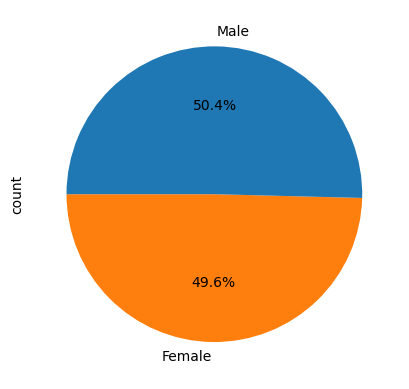

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique number of mice with their gender, clean any duplicate Mouse ID
unique_mice = clean_mouse_study_data.drop_duplicates(subset="Mouse ID")
pie_chart = unique_mice['Sex'].value_counts()
pie_chart = pie_chart.sort_values(ascending=True)

# Create the pie chart using colors '#1f77b4' and '#ff7f0e'
colors = ['#ff7f0e', '#1f77b4']
pie_chart.plot(kind="pie", colors=colors, autopct="%1.1f%%", startangle=180)

# Show the highest percentage on top
plt.show()

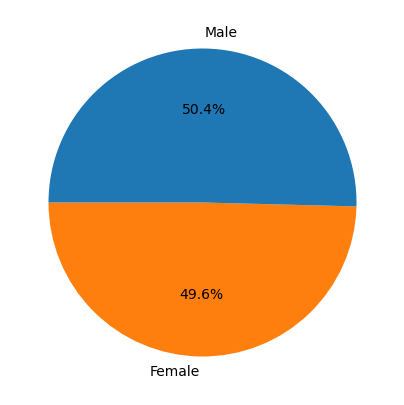

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique number of mice with their gender, clean any duplicate Mouse ID
unique_mice = clean_mouse_study_data.drop_duplicates(subset="Mouse ID")

# Calculate the distribution of unique female versus male mice
pie_data = unique_mice['Sex'].value_counts().sort_values(ascending=True)

# Create the pie chart using matplotlib.pyplot
fig, ax = plt.subplots(figsize=(5, 5))

# Create the pie chart
colors = ['#ff7f0e', '#1f77b4']
ax.pie(
    pie_data,
    labels=pie_data.index,
    autopct='%1.1f%%',
    startangle=180,
    colors=colors
)

# Set the ylabel to an empty string to avoid overlapping with the pie chart
ax.set_ylabel('')

# Show the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse_study_data.groupby("Mouse ID")["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_merge = max_timepoint.merge(clean_mouse_study_data, on=("Mouse ID", "Timepoint"), how="left")    
max_timepoint_merge

# Send these results to a csv file for further analysis
max_timepoint_merge.to_csv("data/max_timepoint.csv", index=False, header=True)

In [14]:
# Put treatments into a list for for loop (and later for plot labels): Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty dictionary to hold the tumor volume data for each treatment
tumor_vol_data = {treatment: [] for treatment in treatments}

# Filter the data for each treatment and calculate the IQR and potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = max_timepoint_merge.loc[max_timepoint_merge['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data[treatment] = tumor_volumes
    
    # Calculate the IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatment} treatment: {len(outliers)} potential outliers")
    print(f"Outliers: {outliers.tolist()}")

# Example output to verify the data
for treatment, volumes in tumor_vol_data.items():
    print(f"{treatment} volumes: {volumes.tolist()[:5]}")  # Print first 5 volumes for each treatment


Capomulin treatment: 0 potential outliers
Outliers: []
Ramicane treatment: 0 potential outliers
Outliers: []
Infubinol treatment: 1 potential outliers
Outliers: [36.3213458]
Ceftamin treatment: 0 potential outliers
Outliers: []
Capomulin volumes: [38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203]
Ramicane volumes: [38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823]
Infubinol volumes: [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309]
Ceftamin volumes: [62.99935619, 45.0, 56.05774909, 55.74282869, 48.72207785]


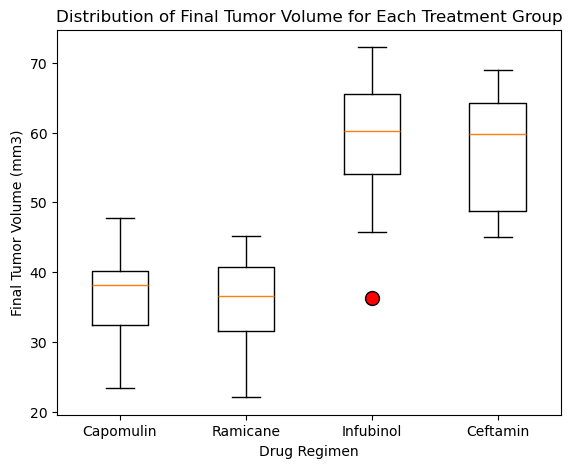

In [15]:
# Create a list to hold the tumor volume data for each treatment
tumor_vol_data = []

# Filter the data for each treatment and store the tumor volumes in the list
for treatment in treatments:
    tumor_volumes = max_timepoint_merge.loc[max_timepoint_merge['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)

# Create the box plot
fig, ax = plt.subplots(figsize=(6.5, 5))
ax.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o', markersize=10))

# Set the labels and title
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Distribution of Final Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

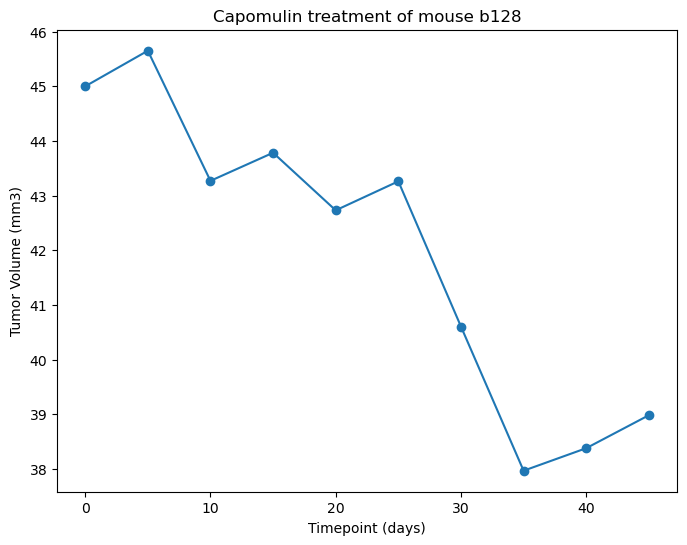

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for the specific mouse treated with Capomulin
mouse_id = 'b128'  # Specify the mouse ID
mouse_data = clean_mouse_study_data[(clean_mouse_study_data['Drug Regimen'] == 'Capomulin') & (clean_mouse_study_data['Mouse ID'] == mouse_id)]

# # Create the timepoints list
timepoints = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

# # Ensure the mouse_data is sorted by Timepoint
mouse_data = mouse_data.sort_values(by='Timepoint')

# # Generate the line plot using Pandas, making sure the timepoints align with the data
plt.figure(figsize=(8, 6))
plt.plot(timepoints, mouse_data['Tumor Volume (mm3)'], marker='o')

# # Set the labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')

# # Show the plot
plt.show()

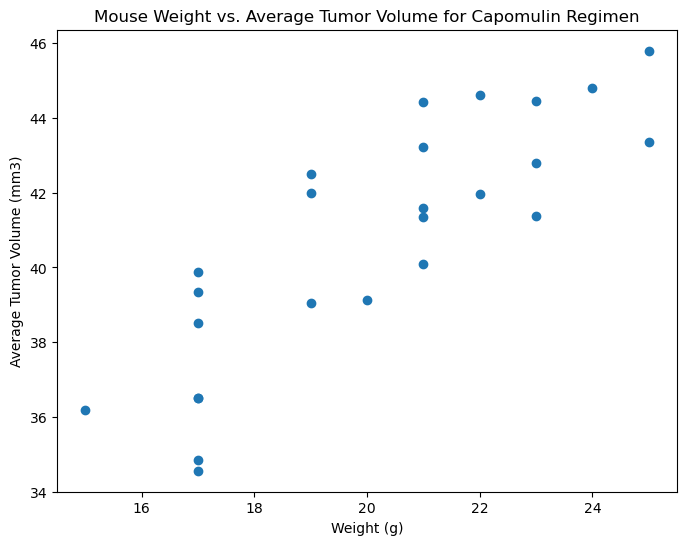

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = clean_mouse_study_data[clean_mouse_study_data['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a DataFrame with the mouse weight and average tumor volume
scatter_data = pd.DataFrame({
    'Weight (g)': mouse_weight,
    'Average Tumor Volume (mm3)': average_tumor_volume
})

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume (mm3)'], marker='o')

# Set the labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


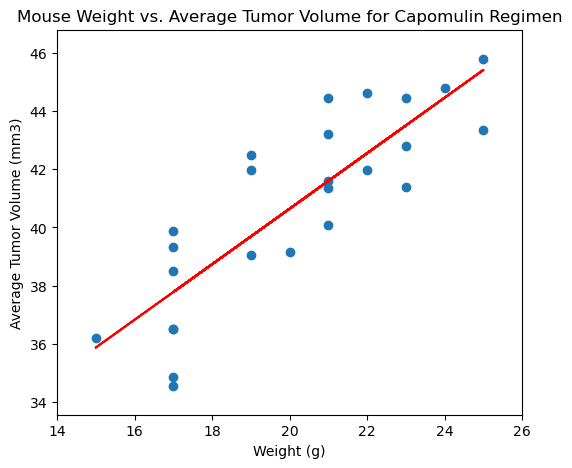

In [18]:
# Filter the data for the Capomulin regimen
capomulin_data = clean_mouse_study_data[clean_mouse_study_data['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a DataFrame with the mouse weight and average tumor volume
scatter_data = pd.DataFrame({
    'Weight (g)': mouse_weight,
    'Average Tumor Volume (mm3)': average_tumor_volume
})

# Create equation of line to calculate predicted tumor volume
slope, intercept, rvalue, pvalue, stderr = st.linregress(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume (mm3)'])

# Print the results of the linear regression
print(f"The correlation between mouse weight and the average tumor volume is {rvalue:.2f}")

# Create equation to caalculate the predicted tumor volume
fit = slope * scatter_data['Weight (g)'] + intercept

# Plot the Average Tumor Volume vs. Mouse Weight scatter plot
# Plot the linear regression model on top of the scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume (mm3)'], marker='o')
plt.plot(scatter_data['Weight (g)'], fit, 'r-')

# Set the labels and title for the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Set the x and y limits for the plot
plt.xlim(mouse_weight.min() - 1, mouse_weight.max() + 1)
plt.ylim(average_tumor_volume.min() - 1, average_tumor_volume.max() + 1)

# Show the plot
plt.show()